# **Facial Emotion Detection**

## **Problem Definition and solution summary**

**The context:** Why is this problem important to solve?<br>
* Learning to recognize emotion from the facial expression can be used in schools to enhance learning and provide personalized tutoring for pupils who are either struggling or gifted. Using facial emotion recognition, the system can automatically identify pupils emotional response to presented material, which will enable to collect each pupil's individual response, but could also capture collective response. This kind of information can also serve as a feedback on the materials and techniques used in the class, helping the teacher to adjust accordingly. Implementing facial emotion recognition could significantly improve the education quality and pupils results.

**The objectives:** What is the intended goal?<br>
* The goal is an improvement of education system, through identification of pupils who might be needing additional assistance

**The key questions:** What are the key questions that need to be answered?<br>
* What are the pupils emotional responses?
* Are they enthusiastic (happy) or withdrawn and discouraged (sad or surprised)?  


**The problem formulation:** What are we trying to solve using data science?<br>
* Enhance pupils results in education establishments (primary schools)



## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [ ]:
# Mount your drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the Libraries**

In [ ]:
!pip install tensorflow tensorflow-addons efficientnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 7.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import os
import zipfile

# For Data Visualization
import cv2
import seaborn as sns
import matplotlib.pyplot as plt

# For Model Building
import tensorflow as tf
import keras
from tensorflow.keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model # Sequential API for sequential model
from tensorflow.keras.layers import Dense, Dropout, Flatten # Importing different layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical # To perform one-hot encoding
from tensorflow.keras.optimizers import RMSprop, Adam, SGD # Optimizers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import losses
from sklearn.metrics import confusion_matrix
from keras.applications import VGG16, ResNet50V2  # Regularization method to prevent the overfitting
from efficientnet.tfkeras import EfficientNetB0  # Regularization method to prevent the overfitting

### **Let us load and unzip the data**

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [ ]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/face_emotion_recognition/Facial_emotion_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

## **Visualizing our Classes**

Let's look at our classes.

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

In [ ]:
folder_path = '/content/Facial_emotion_images/'
pic_size = 48

In [ ]:
def file_number(folder_path):
    # Initialize counter for files
    files_number = 0

    # Iterate through all the items in the folder
    for _, _, files in os.walk(folder_path):
        # Increment the counter for each file found
        files_number += len(files)

    return files_number

### **Happy**

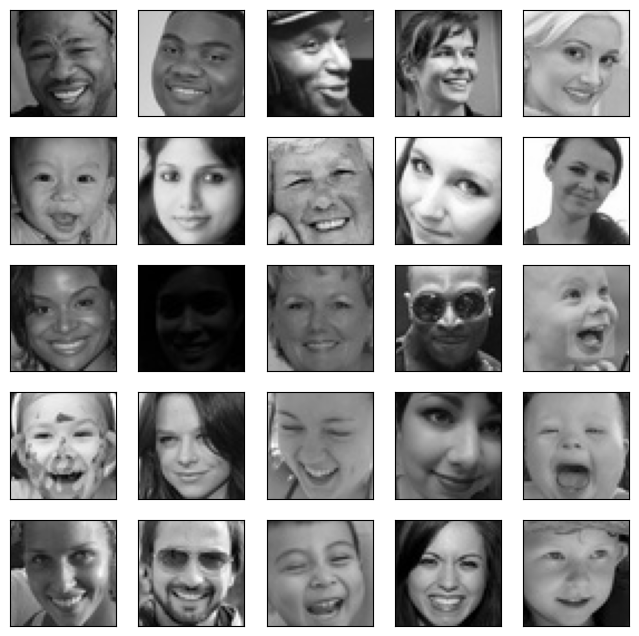

In [ ]:
# Visualizing happy faces
emotion = 'happy'

plt.figure(figsize = (8, 8))
emotion_folder_path = (folder_path + "train/" + emotion)
happy_len = file_number(emotion_folder_path)

for i in range(1, 26, 1):
    plt.subplot(5, 5, i)
    random_index = np.random.randint(0, happy_len)
    img = load_img(folder_path + "train/" + emotion + "/" +
                  os.listdir(folder_path + "train/" + emotion)[random_index], target_size = (pic_size, pic_size))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)

plt.show()

**Observations and Insights:**
* all pictures in training, testing and validation data sets are of same size
* pictures in happy category are in various orientations, zooming and positioning, hence augmentation on these images is not required
* images are quite complex as they represent human faces
* the most pronounced feature of a happy face seem to be wide open mouths with corners tending upwards, which also tends to emphasize the cheeks feature
* teeth are ussually visible on a happy face
* eyes are clear and sparkly

### **Sad**

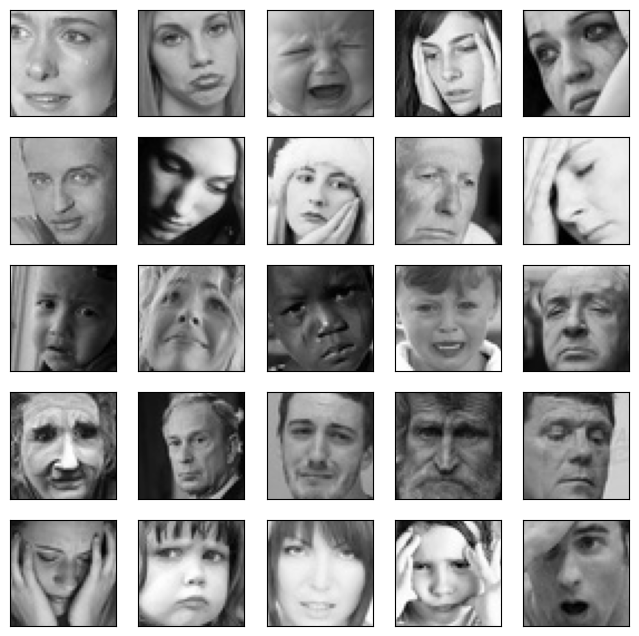

In [ ]:
# Visualizing sad faces
emotion = 'sad'

plt.figure(figsize = (8, 8))
emotion_folder_path = (folder_path + "train/" + emotion)
sad_len = file_number(emotion_folder_path)

for i in range(1, 26, 1):
    plt.subplot(5, 5, i)
    random_index = np.random.randint(0, sad_len)
    img = load_img(folder_path + "train/" + emotion + "/" +
                  os.listdir(folder_path + "train/" + emotion)[random_index], target_size = (pic_size, pic_size))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)

plt.show()

**Observations and Insights:**
* pictures in sad category are in various orientations, zooming and positioning, hence augmentation on these images is not required
* images are quite complex as they represent human faces
* the most pronounced feature of a sad face seem to be close mouths with corners tending downwards
* usually there is some frawning present

### **Neutral**

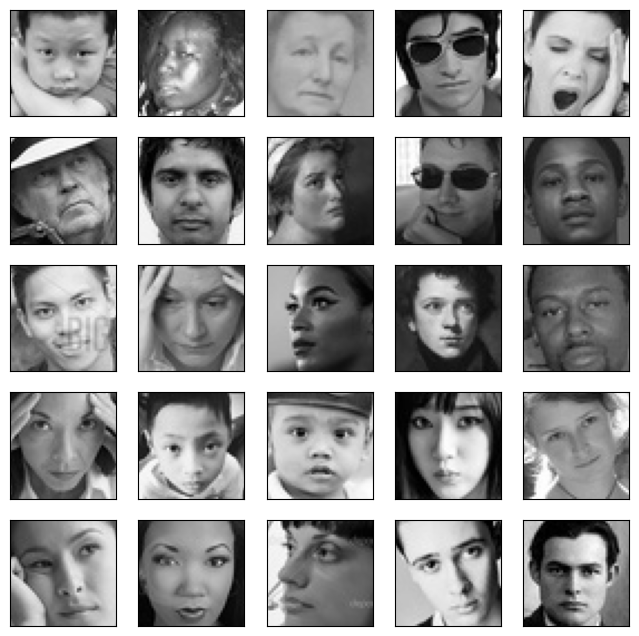

In [ ]:
# Visualizing neutral faces
emotion = 'neutral'

plt.figure(figsize = (8, 8))
emotion_folder_path = (folder_path + "train/" + emotion)
neutral_len = file_number(emotion_folder_path)

for i in range(1, 26, 1):
    plt.subplot(5, 5, i)
    random_index = np.random.randint(0, neutral_len)
    img = load_img(folder_path + "train/" + emotion + "/" +
                  os.listdir(folder_path + "train/" + emotion)[random_index], target_size = (pic_size, pic_size))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)

plt.show()

**Observations and Insights:**
* pictures in neutral category are in various orientations, zooming and positioning, hence augmentation on these images is not required
* images are quite complex as they represent human faces
* the most pronounced feature of a neutral face seem to be mouths in straight line
* with minimal additional mimics present
* some pictures in this category could be very well classified as sad, some could be happy which might affect the models classification performance

### **Surprised**

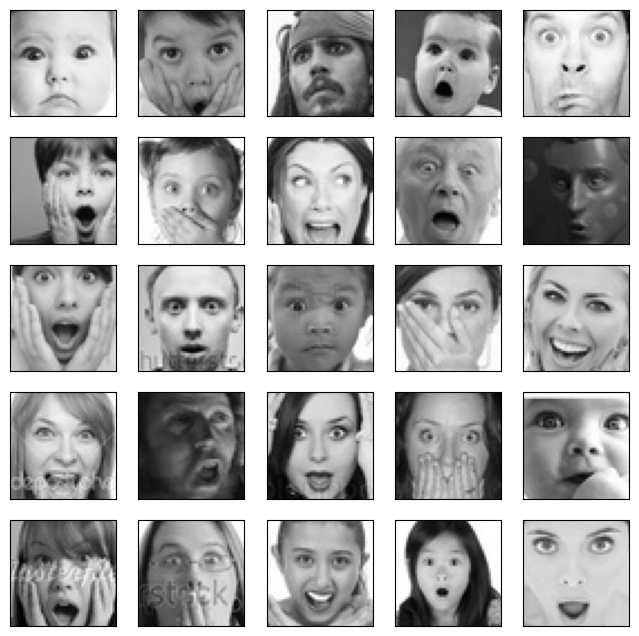

In [ ]:
# Visualizing surprised faces
emotion = 'surprise'


plt.figure(figsize = (8, 8))
emotion_folder_path = (folder_path + "train/" + emotion)
surprised_len = file_number(emotion_folder_path)

for i in range(1, 26, 1):
    plt.subplot(5, 5, i)
    random_index = np.random.randint(0, surprised_len)
    img = load_img(folder_path + "train/" + emotion + "/" +
                  os.listdir(folder_path + "train/" + emotion)[random_index], target_size = (pic_size, pic_size))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)

plt.show()

**Observations and Insights:**

* pictures in surprised category are in various orientations, zooming and positioning, hence augmentation on these images is not required
* images are quite complex as they represent human faces
* the most pronounced feature of a neutral face seem to be mouths wide open, o-shaped
* usually you cannot see teeth on face expressing surprise
* eyes are also wide open and usually the entire iris can be seen
* eyebrows are raised
* another frequent feature is palms within the frame of the face

## **Checking Distribution of Classes**

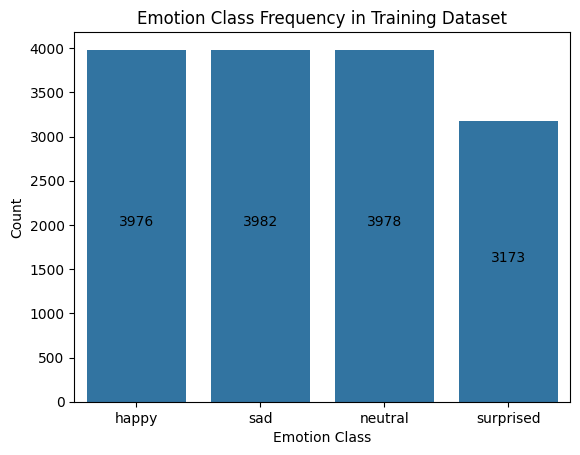

In [ ]:
# creating a barplot with the number of pictures in training data set for each class
lens = [happy_len, sad_len, neutral_len,surprised_len]
countplot = sns.barplot(x= ['happy','sad','neutral', 'surprised'], y = lens)
plt.title('Emotion Class Frequency in Training Dataset')
plt.ylabel('Count')
plt.xlabel('Emotion Class')
for i, val in enumerate(lens):
    countplot.text(i, val / 2, str(val), ha='center')

**Observations and Insights:**
*   Training Dataset sizes are simialar for happy, sad and neutral classes
*   Training dataset size of surprised class is about 20% lower than other classes. This seems a significant difference and might create bias towards the more numerous classes.
* Best option to mitigate the problem would be adding around 800 more samples to the surprise training data set
* However due to the time constrain for completing the model additional pictures cannot be supplied
* due account for this imbalance in trining data I will use model evaluation metrics such as Precision, Recall and F1-score, to supplement accuracy
* all pictures will need to be normalized before feeding into the model
* as there is a diversity of different angles and zoom in/out, no further data augmentation techniques need to be applied


**Think About It:**
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

In [ ]:
# All images have to be rescaled by 1/255.
train_datagen = ImageDataGenerator(rescale = 1.0/255.0)
validation_datagen = ImageDataGenerator(rescale = 1.0/255.0)
test_datagen  = ImageDataGenerator(rescale = 1.0/255.)

In [ ]:
# images are stored in a structured folder and paths need to be set up load images from those folders
train_dir = os.path.join(folder_path, 'train')
test_dir = os.path.join(folder_path, 'test')
val_dir = os.path.join(folder_path, 'validation')

In [ ]:
# Flowing training images in batches of 20 using train_datagen generator grayscale
train_generator_gray = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=64,
                                                    class_mode='categorical',
                                                    target_size=(48, 48),
                                                    color_mode = 'grayscale')

# Flowing testing images in batches of 20 using test_datagen generator grayscale
test_generator_gray =  test_datagen.flow_from_directory(test_dir,
                                                   batch_size=128,
                                                   class_mode  = 'categorical',
                                                   target_size = (48, 48),
                                                   color_mode = 'grayscale')

# Flowing validation images in batches of 20 using test_datagen generator grayscale
validation_generator_gray =  validation_datagen.flow_from_directory(val_dir,
                                                   batch_size=128,
                                                   class_mode  = 'categorical',
                                                   target_size = (48, 48),
                                                   color_mode = 'grayscale')

Found 15109 images belonging to 4 classes.
Found 128 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.


In [ ]:
# Flowing training images in batches of 20 using train_datagen generator rgb
train_generator_rgb = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=64,
                                                    class_mode='categorical',
                                                    target_size=(48, 48),
                                                    color_mode = 'rgb')

# Flowing testing images in batches of 20 using test_datagen generator rgb
test_generator_rgb =  test_datagen.flow_from_directory(test_dir,
                                                   batch_size=128,
                                                   class_mode  = 'categorical',
                                                   target_size = (48, 48),
                                                   color_mode = 'rgb')

# Flowing validation images in batches of 20 using test_datagen generator rgb
validation_generator_rgb =  validation_datagen.flow_from_directory(val_dir,
                                                   batch_size=128,
                                                   class_mode  = 'categorical',
                                                   target_size = (48, 48),
                                                   color_mode = 'rgb')

Found 15109 images belonging to 4 classes.
Found 128 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.


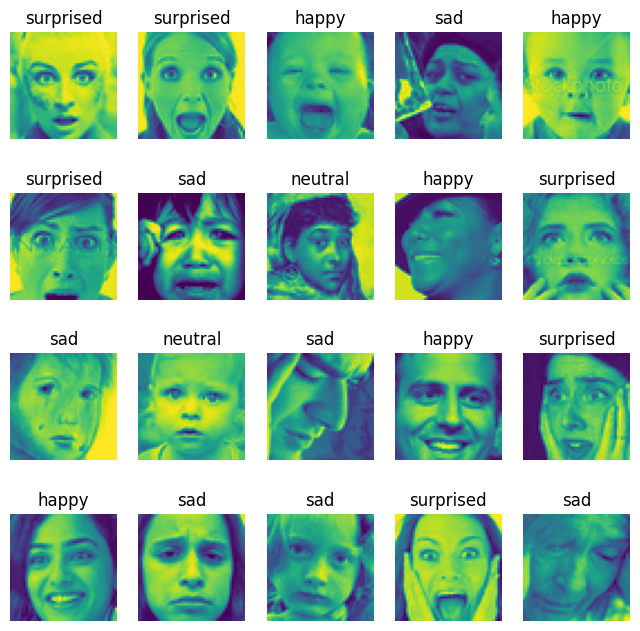

In [ ]:
# visualizing batch images from train_generator_gray
images, labels = next(train_generator_gray)
fig, axes = plt.subplots(4, 5, figsize = (8, 8))
fig.set_size_inches(8, 8)
for (image, label, ax) in zip(images, labels, axes.flatten()):
    ax.imshow(image)
    if label[0] == 1:
        ax.set_title('happy')
    elif label[1] == 1:
        ax.set_title('neutral')
    elif label[2] == 1:
        ax.set_title('sad')
    elif label[3] == 1:
        ax.set_title('surprised')
    ax.axis('off')


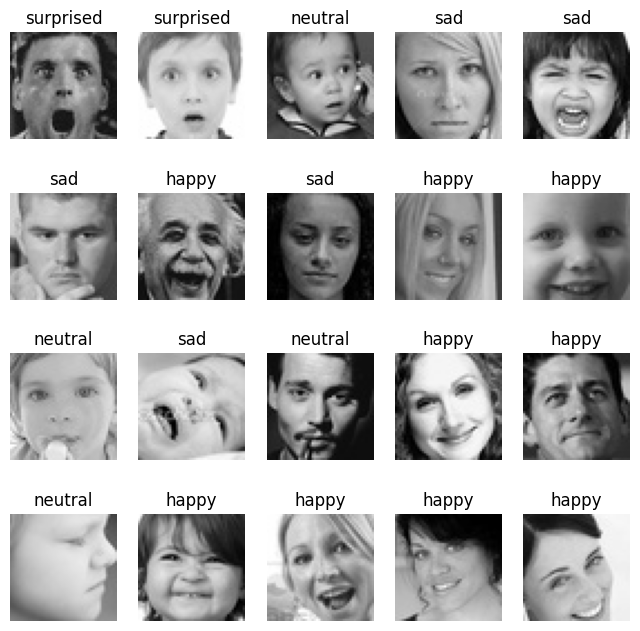

In [ ]:
# visualizing batch images from train_generator_rgb
images, labels = next(train_generator_rgb)
fig, axes = plt.subplots(4, 5, figsize = (8, 8))
fig.set_size_inches(8, 8)
for (image, label, ax) in zip(images, labels, axes.flatten()):
    ax.imshow(image)
    if label[0] == 1:
        ax.set_title('happy')
    elif label[1] == 1:
        ax.set_title('neutral')
    elif label[2] == 1:
        ax.set_title('sad')
    elif label[3] == 1:
        ax.set_title('surprised')
    ax.axis('off')


In [ ]:
# create a function to print classification report and draw heatmap for confusion matrix
def metrics_score(actual, predicted):
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize = (8, 5))
    sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['happy','neutral','sad','surprised'], yticklabels = ['happy','neutral','sad','surprised'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [ ]:
# Function to plot accuracy, val_accuracy,
def plot_accuracy(history):
    N = len(history.history["accuracy"])
    plt.figure()
    plt.plot(np.arange(0, N), history.history["accuracy"], label="train_accuracy")
    plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_accuracy")
    plt.title("Training accuracy Dataset")
    plt.xlabel("Epoch #")
    plt.ylabel("accuracy")
    plt.legend(loc="upper right")

In [ ]:
# Function to plot loss, val_loss,
def plot_loss(history):
    N = len(history.history["loss"])
    plt.figure()
    plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
    plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
    plt.title("Training loss Dataset")
    plt.xlabel("Epoch #")
    plt.ylabel("loss")
    plt.legend(loc="upper right")

## **Model Building**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead?
* What are the advantages of CNNs over ANNs and are they applicable here?

### **Creating the Base Neural Network**

In [ ]:
# clear any previous model's history from the Keras backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(666)
import random
random.seed(666)
tf.random.set_seed(666)

In [ ]:
# cnn for grayscale data with input shape of (48, 48, 1) for one color chanel
# model with 4 convolutional layers with leaky relu activation and added pooling and batch normalization
# fully connected part with 3 dense layers with added dropout layers for regularization

cnn_model_1 = Sequential()
cnn_model_1.add(Conv2D(64, (3,3),  input_shape=(48, 48, 1), padding = 'same'))
cnn_model_1.add(LeakyReLU(0.1))
cnn_model_1.add(MaxPooling2D(2,2))
cnn_model_1.add(BatchNormalization())

cnn_model_1.add(Conv2D(32, (3,3),  padding = 'same'))
cnn_model_1.add(LeakyReLU(0.2))
cnn_model_1.add(Conv2D(32, (3,3),  padding = 'same'))
cnn_model_1.add(LeakyReLU(0.1))
cnn_model_1.add(MaxPooling2D(2,2))
cnn_model_1.add(BatchNormalization())

cnn_model_1.add(Conv2D(16, (3,3),  padding = 'same'))
cnn_model_1.add(LeakyReLU(0.1))
cnn_model_1.add(MaxPooling2D(2,2))
cnn_model_1.add(BatchNormalization())


cnn_model_1.add(Flatten())
cnn_model_1.add(Dense(64, activation='relu'))
cnn_model_1.add(Dropout(0.35))

cnn_model_1.add(Dense(16, activation='relu'))
cnn_model_1.add(Dropout(0.2))

cnn_model_1.add(Dense(16, activation='relu'))
cnn_model_1.add(Dense(4, activation='softmax'))

### **Compiling and Training the Model**

In [ ]:
# compiling the model with Adam optimizer, categorical crossentropy loss function as this is multi class model
# and accuracy metrics to evaluate the models performance during traiing and validation

opt = Adam(learning_rate = 0.001) #use Adam optimizer with default learning rate
cnn_model_1.compile(loss="categorical_crossentropy", optimizer=opt, metrics = ['accuracy'])
cnn_model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 batch_normalization_3 (Bat  (None, 24, 24, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 24, 24, 32)       

In [ ]:
# Pulling a single large batch of random validation data for validating after each epoch
valX, valY = validation_generator_gray.next()

In [ ]:
# training the model of training data set and validating on validation data set
# training history saved to cnn_1_hist_gray

# Reduce LR on Plateau callback will reduce the learning rate to 0.2 of its current value, if val_loss does not improve for 5 consecutive epochs
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_loss',
                                            patience = 5,
                                            verbose = 1,
                                            factor = 0.2,
                                            cooldown = 2,
                                            min_lr = 0.0001)

cnn_1_hist_gray = cnn_model_1.fit(train_generator_gray,
                              validation_data=(valX, valY),
                              epochs=15,
                              callbacks = [learning_rate_reduction]    )

Epoch 1/15
237/237 [==============================] - 9s 26ms/step - loss: 1.3022 - accuracy: 0.3712 - val_loss: 1.3064 - val_accuracy: 0.3672 - lr: 0.0010
Epoch 2/15
237/237 [==============================] - 6s 24ms/step - loss: 1.1190 - accuracy: 0.4963 - val_loss: 1.0593 - val_accuracy: 0.5156 - lr: 0.0010
Epoch 3/15
237/237 [==============================] - 6s 27ms/step - loss: 1.0137 - accuracy: 0.5564 - val_loss: 1.0276 - val_accuracy: 0.5781 - lr: 0.0010
Epoch 4/15
237/237 [==============================] - 5s 23ms/step - loss: 0.9433 - accuracy: 0.5920 - val_loss: 1.1184 - val_accuracy: 0.5547 - lr: 0.0010
Epoch 5/15
237/237 [==============================] - 6s 23ms/step - loss: 0.8802 - accuracy: 0.6263 - val_loss: 0.8266 - val_accuracy: 0.6953 - lr: 0.0010
Epoch 6/15
237/237 [==============================] - 7s 28ms/step - loss: 0.8212 - accuracy: 0.6595 - val_loss: 0.7643 - val_accuracy: 0.7109 - lr: 0.0010
Epoch 7/15
237/237 [==============================] - 5s 23ms/st

### **Evaluating the Model on the Test Set**

In [ ]:
# evaluate the model on test data
cnn_model_1.evaluate(test_generator_gray)

1/1 [==============================] - 0s 269ms/step - loss: 0.6739 - accuracy: 0.7500


[0.6739221215248108, 0.75]

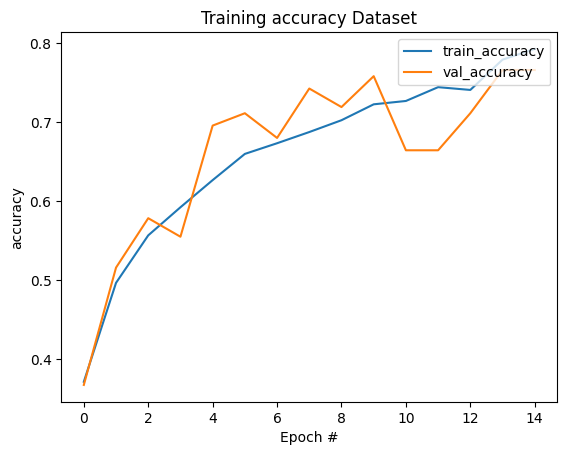

In [ ]:
plot_accuracy(cnn_1_hist_gray)

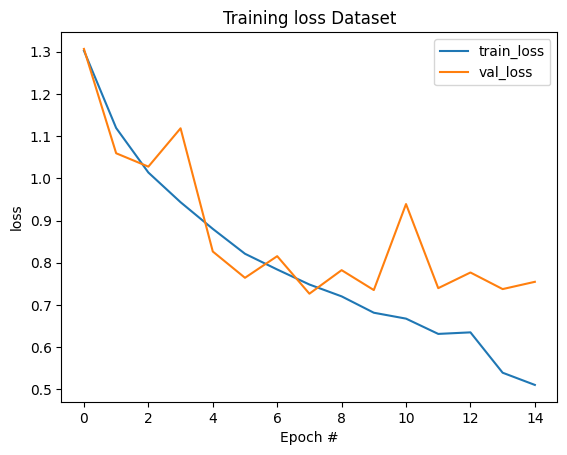

In [ ]:
plot_loss(cnn_1_hist_gray)

4/4 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        32
           1       0.69      0.75      0.72        32
           2       0.56      0.56      0.56        32
           3       0.97      0.88      0.92        32

    accuracy                           0.75       128
   macro avg       0.76      0.75      0.75       128
weighted avg       0.76      0.75      0.75       128



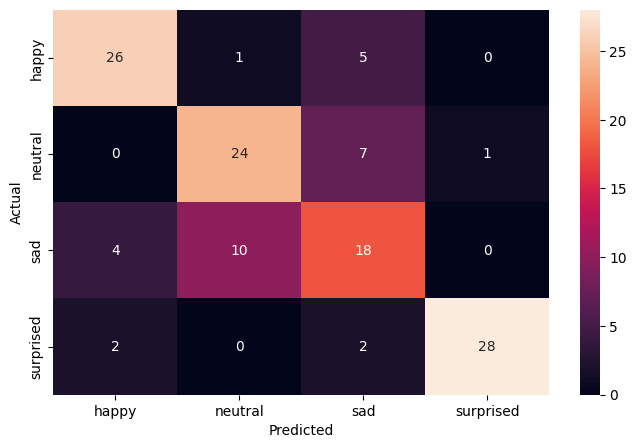

In [ ]:
# get test images and their classes
test_images, test_classes = next(test_generator_gray)
actual_classes = np.argmax(test_classes, axis = -1)

# Make predictions
cnn_1_predictions = cnn_model_1.predict(test_images)
# Convert predictions to class labels
cnn_1_predictions = np.argmax(cnn_1_predictions, axis = -1)

# generate classification report and confussion matrix
metrics_score(actual_classes,cnn_1_predictions )

**Observations and Insights:**
* model had 73028 trainable parameters
* model has achieved 79% accuracy on train set and 77% on validation set, however accuracy on test data evaluation was a bit lower at 75%,
* there is an indication of the model overfitting the data, as both accuracy and loss tend to improve for the entire run of 30 epochs, while validatoin loss and validation accuracy have stagnaged around epoch 15,
* it does misclassify between neutral and sad categories quite a lot, which can be observed by lower recall and precision scores for both classes (neutral and sad)
* this decreased performance might be due to train data set quality, as it does have a bit of overlay and pictures in netral could be classified as sad and vice versa

##Re-running Base Neural Network on RGB data

In [ ]:
# clear the previous model's history from the Keras backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(666)
import random
random.seed(666)
tf.random.set_seed(666)

### **Creating the Base Neural Network for RGB data**

In [ ]:
# running same model on rgb data to compare results
# cnn for rgb data with input shape of (48, 48, 3) for three color channels
# model with 4 convolutional layers with leaky relu activation and added pooling and batch normalization
# fully connected part with 3 dense layers with added dropout layers for regularization

cnn_model_1rgb = Sequential()
cnn_model_1rgb.add(Conv2D(64, (3,3),  input_shape=(48, 48, 3), padding = 'same'))
cnn_model_1rgb.add(LeakyReLU(0.1))
cnn_model_1rgb.add(MaxPooling2D(2,2))
cnn_model_1rgb.add(BatchNormalization())

cnn_model_1rgb.add(Conv2D(32, (3,3),  padding = 'same'))
cnn_model_1rgb.add(LeakyReLU(0.2))
cnn_model_1rgb.add(Conv2D(32, (3,3),  padding = 'same'))
cnn_model_1rgb.add(LeakyReLU(0.1))
cnn_model_1rgb.add(MaxPooling2D(2,2))
cnn_model_1rgb.add(BatchNormalization())

cnn_model_1rgb.add(Conv2D(16, (3,3),  padding = 'same'))
cnn_model_1rgb.add(LeakyReLU(0.1))
cnn_model_1rgb.add(MaxPooling2D(2,2))
cnn_model_1rgb.add(BatchNormalization())


cnn_model_1rgb.add(Flatten())
cnn_model_1rgb.add(Dense(64, activation='relu'))
cnn_model_1rgb.add(Dropout(0.35))

cnn_model_1rgb.add(Dense(16, activation='relu'))
cnn_model_1rgb.add(Dropout(0.2))

cnn_model_1rgb.add(Dense(16, activation='relu'))
cnn_model_1rgb.add(Dense(4, activation='softmax'))

### **Compiling and Training the Model**

In [ ]:
# compiling the model with Adam optimizer, categorical crossentropy loss function as this is multi class model
# and accuracy metrics to evaluate the models performance during traiing and validation

opt = Adam(learning_rate = 0.001) #use Adam optimizer with default learning rate
cnn_model_1rgb.compile(loss="categorical_crossentropy", optimizer= opt, metrics = ['accuracy'])
cnn_model_1rgb.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        1792      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 24, 24, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 24, 24, 32)        0

In [ ]:
# Pulling a single large batch of random validation data for validating after each epoch
valX, valY = validation_generator_rgb.next()

In [ ]:
# training the model of training data set and validating on validation data set
# training history saved to cnn_1_hist_rgb

# Reduce LR on Plateau callback will reduce the learning rate to 0.2 of its current value, if val_loss does not improve for 5 consecutive epochs
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_loss',
                                            patience = 5,
                                            verbose = 1,
                                            factor = 0.2,
                                            cooldown = 2,
                                            min_lr = 0.0001)

cnn_1_hist_rgb = cnn_model_1rgb.fit(train_generator_rgb,
                              validation_data=(valX, valY),
                              epochs=15,
                              callbacks = [learning_rate_reduction]    )

Epoch 1/15
237/237 [==============================] - 14s 31ms/step - loss: 1.3222 - accuracy: 0.3491 - val_loss: 1.2789 - val_accuracy: 0.4453 - lr: 0.0010
Epoch 2/15
237/237 [==============================] - 8s 33ms/step - loss: 1.1508 - accuracy: 0.4760 - val_loss: 1.2327 - val_accuracy: 0.4531 - lr: 0.0010
Epoch 3/15
237/237 [==============================] - 7s 31ms/step - loss: 1.0254 - accuracy: 0.5487 - val_loss: 1.0727 - val_accuracy: 0.5703 - lr: 0.0010
Epoch 4/15
237/237 [==============================] - 7s 29ms/step - loss: 0.9442 - accuracy: 0.5904 - val_loss: 1.4013 - val_accuracy: 0.3594 - lr: 0.0010
Epoch 5/15
237/237 [==============================] - 7s 31ms/step - loss: 0.8889 - accuracy: 0.6214 - val_loss: 0.9566 - val_accuracy: 0.5781 - lr: 0.0010
Epoch 6/15
237/237 [==============================] - 7s 31ms/step - loss: 0.8382 - accuracy: 0.6457 - val_loss: 0.9553 - val_accuracy: 0.6094 - lr: 0.0010
Epoch 7/15
237/237 [==============================] - 8s 33ms/s

In [ ]:
# evaluate the model on test data
cnn_model_1rgb.evaluate(test_generator_rgb)

1/1 [==============================] - 0s 422ms/step - loss: 0.6653 - accuracy: 0.7266


[0.6652733087539673, 0.7265625]

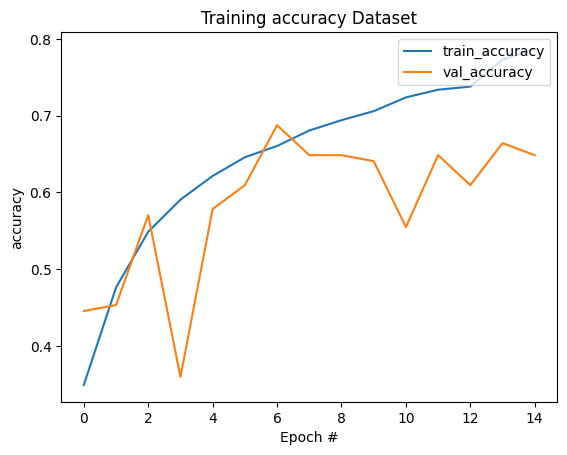

In [ ]:
plot_accuracy(cnn_1_hist_rgb)

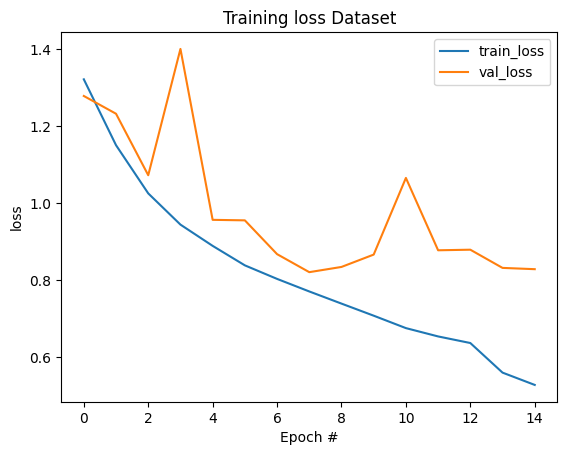

In [ ]:
plot_loss(cnn_1_hist_rgb)

4/4 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.74      0.81      0.78        32
           1       0.60      0.78      0.68        32
           2       0.65      0.47      0.55        32
           3       0.96      0.84      0.90        32

    accuracy                           0.73       128
   macro avg       0.74      0.73      0.72       128
weighted avg       0.74      0.73      0.72       128



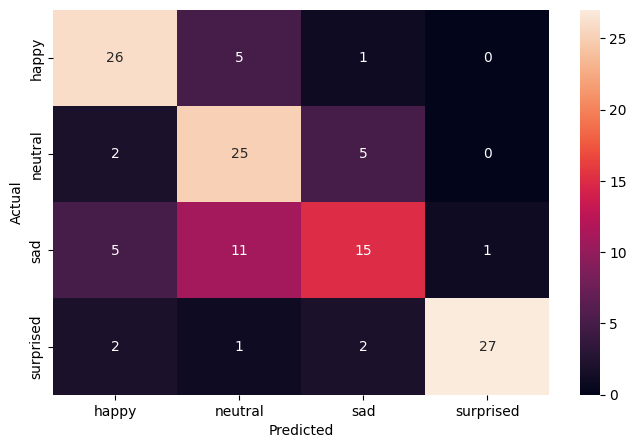

In [ ]:
# get test images and their classes
test_images, test_classes = next(test_generator_rgb)
actual_classes = np.argmax(test_classes, axis = -1)

# Make predictions
cnn_1rgb_predictions = cnn_model_1rgb.predict(test_images)
# Convert predictions to class labels
cnn_1rgb_predictions = np.argmax(cnn_1rgb_predictions, axis = -1)

# generate classification report and confussion matrix
metrics_score(actual_classes,cnn_1rgb_predictions )

**Observations and Insights:**
* re-running the model on rgb images with 3 color input channel
* model has 72884 trainable parameters
* accuracy on train data is similarly on 79% level, validation accuracy at a very low 65% and testing accuracy are on 72% level
* when it comes to misclassified pictures, same categories are affected, most misclassification happening between neutral and sad (both ways)
* this time the one channel gray scale model definitely outperformend the rgb model






### **Creating the second Convolutional Neural Network**

- Try out a slightly larger architecture

In [ ]:
# clear the previous model's history from the Keras backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(666)
import random
random.seed(666)
tf.random.set_seed(666)

In [ ]:
# building a bit larger architecture

cnn_model_2 = Sequential()
cnn_model_2.add(Conv2D(512, (3,3),  input_shape=(48, 48, 3), padding = 'same'))
cnn_model_2.add(LeakyReLU(0.01))
cnn_model_2.add(BatchNormalization())

cnn_model_2.add(Conv2D(256, (3,3),  padding = 'same'))
cnn_model_2.add(LeakyReLU(0.07))
cnn_model_2.add(Conv2D(256, (3,3),  padding = 'same'))
cnn_model_2.add(LeakyReLU(0.1))
cnn_model_2.add(BatchNormalization())
cnn_model_2.add(MaxPooling2D(2,2))

cnn_model_2.add(Conv2D(64, (3,3),  padding = 'same'))
cnn_model_2.add(LeakyReLU(0.1))
cnn_model_2.add(Conv2D(64, (3,3),  padding = 'same'))
cnn_model_2.add(LeakyReLU(0.1))
cnn_model_2.add(BatchNormalization())
cnn_model_2.add(MaxPooling2D(2,2))

cnn_model_2.add(Conv2D(16, (3,3),  padding = 'same'))
cnn_model_2.add(LeakyReLU(0.05))
cnn_model_2.add(BatchNormalization())


cnn_model_2.add(Flatten())
cnn_model_2.add(Dense(256))
cnn_model_2.add(LeakyReLU(0.1))
cnn_model_2.add(Dropout(0.25))

cnn_model_2.add(Dense(256))
cnn_model_2.add(LeakyReLU(0.1))
cnn_model_2.add(Dropout(0.25))

cnn_model_2.add(Dense(128))
cnn_model_2.add(LeakyReLU(0.1))
cnn_model_2.add(Dropout(0.25))

cnn_model_2.add(Dense(4, activation='softmax'))

### **Compiling and Training the Model**

In [ ]:
# compiling the model with Adam optimizer, categorical crossentropy loss function as this is multi class model
# and accuracy metrics to evaluate the models performance during traiing and validation

opt = Adam(learning_rate = 0.001) #use Adam optimizer with default learning rate
cnn_model_2.compile(loss="categorical_crossentropy", optimizer="adam", metrics = ['accuracy'])
cnn_model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 512)       14336     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 512)       0         
                                                                 
 batch_normalization (Batch  (None, 48, 48, 512)       2048      
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 256)       1179904   
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 48, 48, 256)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 256)       590080    
                                                        

In [ ]:
# Pulling a single large batch of random validation data for validating after each epoch
valX, valY = validation_generator_rgb.next()

In [ ]:
# the following code will stop the training if the val_loss continues above min val_loss for the run for more than 8 epochs
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 8)

# Reduce LR on Plateau callback will reduce the learning rate to 0.2 of its current value, if val_loss does not improve for 5 consecutive epochs
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_loss',
                                            patience = 5,
                                            verbose = 1,
                                            factor = 0.2,
                                            cooldown = 2,
                                            min_lr = 0.0001)


# training the model of training data set and validating on validation data set
# training history saved to cnn_2_hist
cnn_2_hist = cnn_model_2.fit(train_generator_rgb,
                              validation_data=(valX, valY),
                              epochs=20,
                              callbacks = [es, learning_rate_reduction])

Epoch 1/20
237/237 [==============================] - 31s 79ms/step - loss: 1.2068 - accuracy: 0.4553 - val_loss: 1.2786 - val_accuracy: 0.3359 - lr: 0.0010
Epoch 2/20
237/237 [==============================] - 18s 77ms/step - loss: 0.9380 - accuracy: 0.5921 - val_loss: 0.9011 - val_accuracy: 0.5781 - lr: 0.0010
Epoch 3/20
237/237 [==============================] - 19s 79ms/step - loss: 0.8135 - accuracy: 0.6545 - val_loss: 0.8364 - val_accuracy: 0.6562 - lr: 0.0010
Epoch 4/20
237/237 [==============================] - 18s 76ms/step - loss: 0.7105 - accuracy: 0.7037 - val_loss: 0.7564 - val_accuracy: 0.6953 - lr: 0.0010
Epoch 5/20
237/237 [==============================] - 18s 76ms/step - loss: 0.6464 - accuracy: 0.7379 - val_loss: 0.8246 - val_accuracy: 0.6719 - lr: 0.0010
Epoch 6/20
237/237 [==============================] - 17s 70ms/step - loss: 0.5674 - accuracy: 0.7706 - val_loss: 0.6893 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 7/20
237/237 [==============================] - 17s 

### **Evaluating the Model on the Test Set**

In [ ]:
# evaluate cnn_model_2 on test data
cnn_model_2.evaluate(test_generator_rgb)

1/1 [==============================] - 4s 4s/step - loss: 0.9150 - accuracy: 0.7812


[0.91496741771698, 0.78125]

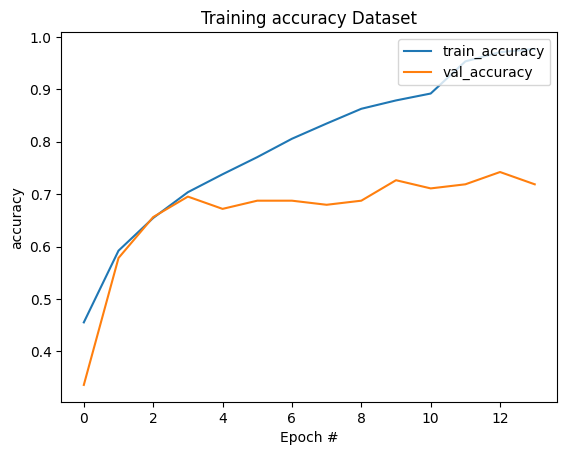

In [ ]:
plot_accuracy(cnn_2_hist)

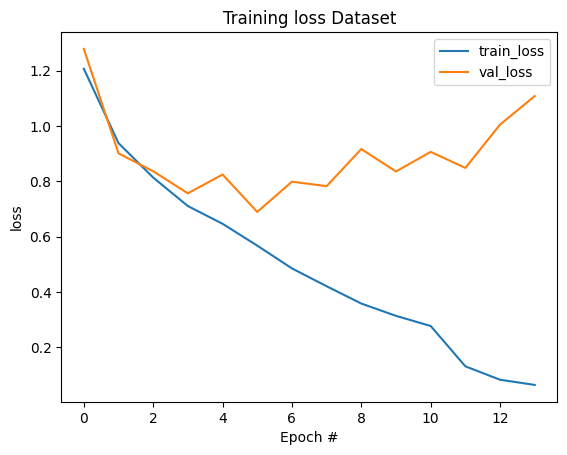

In [ ]:
plot_loss(cnn_2_hist)

4/4 [==============================] - 0s 12ms/step
              precision    recall  f1-score   support

           0       0.84      0.81      0.83        32
           1       0.78      0.78      0.78        32
           2       0.69      0.69      0.69        32
           3       0.82      0.84      0.83        32

    accuracy                           0.78       128
   macro avg       0.78      0.78      0.78       128
weighted avg       0.78      0.78      0.78       128



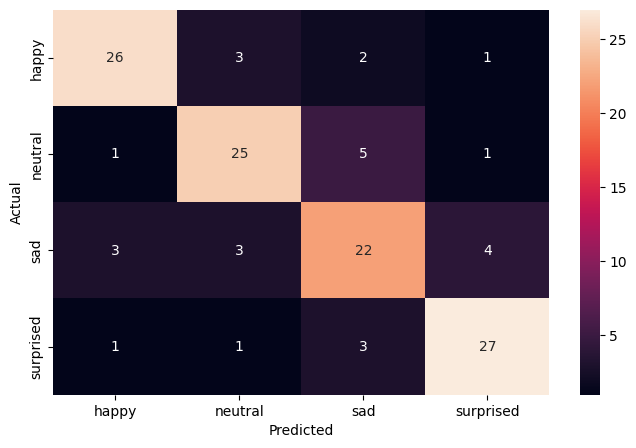

In [ ]:
# get test images and their classes
test_images, test_classes = next(test_generator_rgb)
actual_classes = np.argmax(test_classes, axis = -1)

# Make predictions
cnn_2_predictions = cnn_model_2.predict(test_images)
# Convert predictions to class labels
cnn_2_predictions = np.argmax(cnn_2_predictions, axis = -1)

# generate classification report and confussion matrix
metrics_score(actual_classes,cnn_2_predictions )

**Observations and Insights:**
* model has 2.7M trainable parameters
* accuracy has been much improved on training data set up to 98%, validation accuracy achieved 72% and testing accuracy score is 78%
* the almost perfect training accuracy and much lower validation accuracy  indicates the model is highly overfitting the data
* the confusion matrix results show that this model is doing much better the the predecessors in differenciating between neutral and sad, but making few more mistakes happy and sad classes


## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?
* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

In [ ]:
# creating rbg loaders using the already initialized datagenerators
# this time changing target size to 224x224 to fit the pre tained networks' input shapes
# Flowing training images in batches of 20 using train_datagen generator rgb
train_generator_rgb_2 = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=64,
                                                    class_mode='categorical',
                                                    target_size=(224, 224),
                                                    color_mode = 'rgb')

# Flowing testing images in batches of 20 using test_datagen generator rgb
test_generator_rgb_2 =  test_datagen.flow_from_directory(test_dir,
                                                   batch_size=128,
                                                   class_mode  = 'categorical',
                                                   target_size = (224, 224),
                                                   color_mode = 'rgb')

# Flowing validation images in batches of 20 using test_datagen generator rgb
validation_generator_rgb_2 =  validation_datagen.flow_from_directory(val_dir,
                                                   batch_size=128,
                                                   class_mode  = 'categorical',
                                                   target_size = (224, 224),
                                                   color_mode = 'rgb')

Found 15109 images belonging to 4 classes.
Found 128 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.


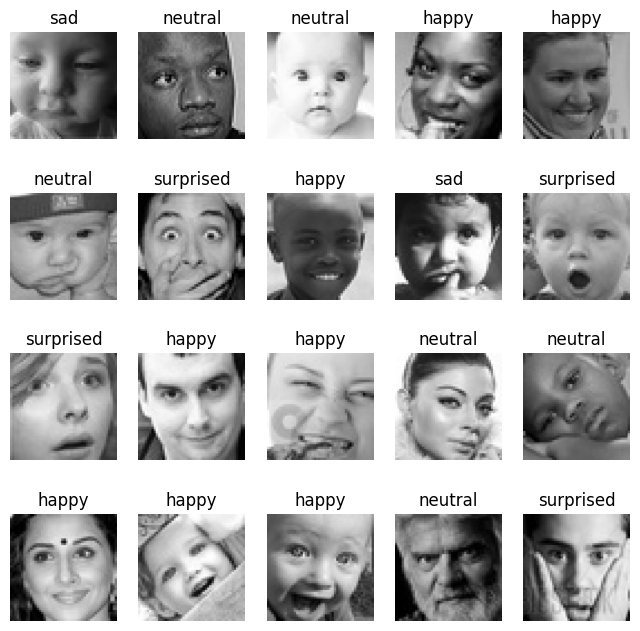

In [ ]:
# visualizing batch images from train_generator_rgb_2
images, labels = next(train_generator_rgb_2)
fig, axes = plt.subplots(4, 5, figsize = (8, 8))
fig.set_size_inches(8, 8)
for (image, label, ax) in zip(images, labels, axes.flatten()):
    ax.imshow(image)
    if label[0] == 1:
        ax.set_title('happy')
    elif label[1] == 1:
        ax.set_title('neutral')
    elif label[2] == 1:
        ax.set_title('sad')
    elif label[3] == 1:
        ax.set_title('surprised')
    ax.axis('off')


## **VGG16 Model**

### **Importing the VGG16 Architecture**

In [ ]:
# clear the previous model's history from the Keras backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(666)
import random
random.seed(666)
tf.random.set_seed(666)

In [ ]:
# Summary of the whole VGG16 model
model = VGG16(weights='imagenet')
model.summary()

553467096/553467096 [==============================] - 16s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
# I will be using all 5 convoluitonal layers from VGG
transfer_layer = model.get_layer('block5_pool')
vgg_model = Model(inputs=model.input, outputs=transfer_layer.output)
vgg_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False
    print(layer.name, layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [ ]:
# building CNN model with VGG engine

vgg_engine_model = Sequential()

# Adding the convolutional part of the VGG16 created above
vgg_engine_model.add(vgg_model)

# Flattening the output of the VGG16 engine
vgg_engine_model.add(Flatten())

# Adding a dense output layer
vgg_engine_model.add(Dense(32))
vgg_engine_model.add(LeakyReLU(0.1))
vgg_engine_model.add(Dropout(0.1))
vgg_engine_model.add(Dense(32))
vgg_engine_model.add(LeakyReLU(0.1))
vgg_engine_model.add(Dense(16))
vgg_engine_model.add(LeakyReLU(0.1))
vgg_engine_model.add(Dense(4, activation='softmax'))

In [ ]:
# print model summary
vgg_engine_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 32)                802848    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32)                0         
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32)                0

### **Compiling and Training the VGG16 Model**

In [ ]:
# compiling the model with Adam optimizer, categorical crossentropy loss function as this is multi class model
# and accuracy metrics to evaluate the models performance during traiing and validation

opt = Adam(learning_rate = 0.001) #use Adam optimizer with default learning rate

vgg_engine_model.compile(loss="categorical_crossentropy", optimizer=opt, metrics = ['accuracy'])

In [ ]:
# Pulling a single large batch of random validatio data for validating after each epoch
valX, valY = validation_generator_rgb_2.next()

# the following code will stop the training if the val_loss continues above min val_loss for the run for more than 8 epochs
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 8)

# Reduce LR on Plateau callback will reduce the learning rate to 0.2 of its current value, if val_loss does not improve for 5 consecutive epochs
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_loss',
                                            patience = 5,
                                            verbose = 1,
                                            factor = 0.2,
                                            cooldown = 2,
                                            min_lr = 0.0001)


vgg_hist = vgg_engine_model.fit(train_generator_rgb_2,
                              validation_data=(valX, valY),
                              epochs=20,
                              callbacks = [es, learning_rate_reduction])

Epoch 1/20
237/237 [==============================] - 43s 160ms/step - loss: 1.1309 - accuracy: 0.4955 - val_loss: 0.9085 - val_accuracy: 0.6172 - lr: 0.0010
Epoch 2/20
237/237 [==============================] - 34s 141ms/step - loss: 0.8973 - accuracy: 0.6229 - val_loss: 0.8957 - val_accuracy: 0.5938 - lr: 0.0010
Epoch 3/20
237/237 [==============================] - 37s 158ms/step - loss: 0.8002 - accuracy: 0.6677 - val_loss: 0.8204 - val_accuracy: 0.6562 - lr: 0.0010
Epoch 4/20
237/237 [==============================] - 34s 141ms/step - loss: 0.7451 - accuracy: 0.6904 - val_loss: 0.9674 - val_accuracy: 0.5703 - lr: 0.0010
Epoch 5/20
237/237 [==============================] - 32s 136ms/step - loss: 0.7134 - accuracy: 0.7077 - val_loss: 0.8967 - val_accuracy: 0.6016 - lr: 0.0010
Epoch 6/20
237/237 [==============================] - 34s 143ms/step - loss: 0.6662 - accuracy: 0.7267 - val_loss: 1.3335 - val_accuracy: 0.5547 - lr: 0.0010
Epoch 7/20
237/237 [==============================] 

### **Evaluating the VGG16 model**

In [ ]:
# evaluate vgg_engine_model on test data
vgg_engine_model.evaluate(test_generator_rgb_2)

1/1 [==============================] - 9s 9s/step - loss: 0.7871 - accuracy: 0.6953


[0.7870687246322632, 0.6953125]

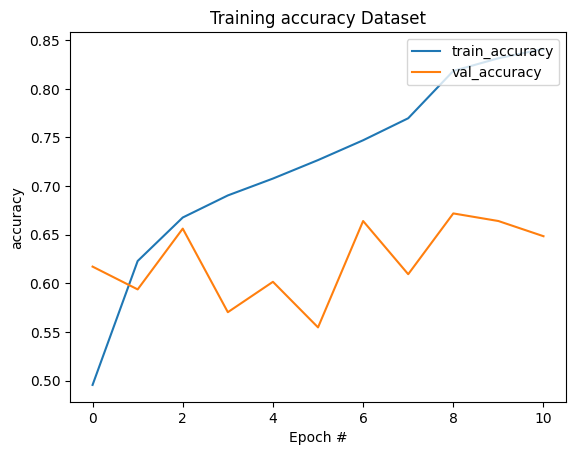

In [ ]:
plot_accuracy(vgg_hist)

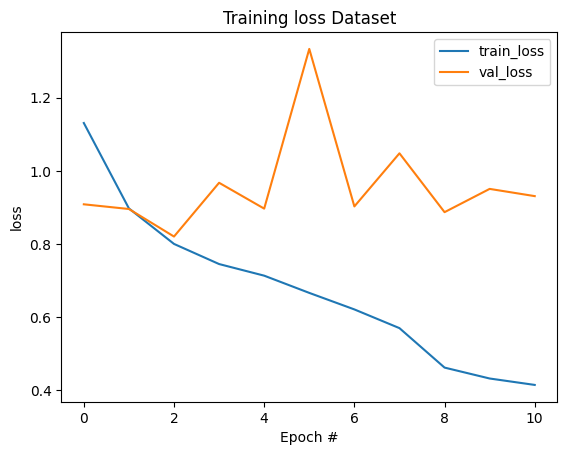

In [ ]:
plot_loss(vgg_hist)

4/4 [==============================] - 0s 41ms/step
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        32
           1       0.59      0.59      0.59        32
           2       0.58      0.56      0.57        32
           3       0.84      0.81      0.83        32

    accuracy                           0.70       128
   macro avg       0.69      0.70      0.69       128
weighted avg       0.69      0.70      0.69       128



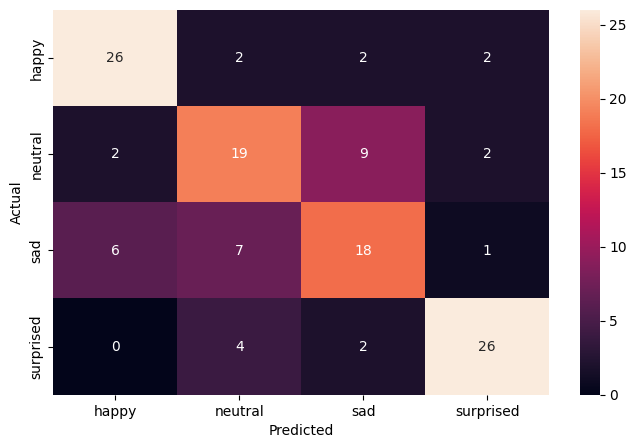

In [ ]:
# get test images and their classes
test_images, test_classes = next(test_generator_rgb_2)
actual_classes = np.argmax(test_classes, axis = -1)

# Make predictions
vgg_predictions = vgg_engine_model.predict(test_images)
# Convert predictions to class labels
vgg_predictions = np.argmax(vgg_predictions, axis = -1)

# generate classification report and confussion matrix
metrics_score(actual_classes,vgg_predictions )

**Think About It:**

- What do you infer from the general trend in the training performance?
- Is the training accuracy consistently improving?
- Is the validation accuracy also improving similarly?

**Observations and Insights:**
* training accuracy has been improving through the epochs, however validation accuracy oscillated around constant level, with no significant improvments, same observation applies to training loss and validation loss
* implying the model memorized the pictures and did not learn and generalize, ie. overfitted the data
* it performed worse than the previous custom built cnn_models


**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**

## **ResNet V2 Model**

In [ ]:
# clear the previous model's history from the Keras backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(666)
import random
random.seed(666)
tf.random.set_seed(666)

In [ ]:
model = ResNet50V2(weights='imagenet')
model.summary()

102869336/102869336 [==============================] - 3s 0us/step
Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                      

### **Model Building**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
# again, I will use the entire Resnet v2 architechture up to avg_pool (GlobalAveragePooling2D)
transfer_layer = model.get_layer('avg_pool')
resnet_model = Model(inputs=model.input, outputs=transfer_layer.output)
resnet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                              

In [ ]:
# # Making all the layers of the Resnet model non-trainable. i.e. freezing them
for layer in resnet_model.layers:
    layer.trainable = False
    print(layer.name, layer.trainable)

input_1 False
conv1_pad False
conv1_conv False
pool1_pad False
pool1_pool False
conv2_block1_preact_bn False
conv2_block1_preact_relu False
conv2_block1_1_conv False
conv2_block1_1_bn False
conv2_block1_1_relu False
conv2_block1_2_pad False
conv2_block1_2_conv False
conv2_block1_2_bn False
conv2_block1_2_relu False
conv2_block1_0_conv False
conv2_block1_3_conv False
conv2_block1_out False
conv2_block2_preact_bn False
conv2_block2_preact_relu False
conv2_block2_1_conv False
conv2_block2_1_bn False
conv2_block2_1_relu False
conv2_block2_2_pad False
conv2_block2_2_conv False
conv2_block2_2_bn False
conv2_block2_2_relu False
conv2_block2_3_conv False
conv2_block2_out False
conv2_block3_preact_bn False
conv2_block3_preact_relu False
conv2_block3_1_conv False
conv2_block3_1_bn False
conv2_block3_1_relu False
conv2_block3_2_pad False
conv2_block3_2_conv False
conv2_block3_2_bn False
conv2_block3_2_relu False
max_pooling2d False
conv2_block3_3_conv False
conv2_block3_out False
conv3_block1_pre

In [ ]:
# building CNN model with Resnet engine
# I will use same CNN structure and only replace the engine to Resnet

resnet_engine_model = Sequential()

# Adding the convolutional part of the Resnet created above
resnet_engine_model.add(resnet_model)

# Flattening the output of the Resnet engine
resnet_engine_model.add(Flatten())

# Adding a dense output layer
resnet_engine_model.add(Dense(32))
resnet_engine_model.add(LeakyReLU(0.1))
resnet_engine_model.add(Dropout(0.1))
resnet_engine_model.add(Dense(32))
resnet_engine_model.add(LeakyReLU(0.1))
resnet_engine_model.add(Dense(16))
resnet_engine_model.add(LeakyReLU(0.1))
resnet_engine_model.add(Dense(4, activation='softmax'))

# print model summary
resnet_engine_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 2048)              23564800  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 32)                65568     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32)                0         
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32)                0

### **Compiling and Training the Model**

In [ ]:
# compiling the model with Adam optimizer, categorical crossentropy loss function as this is multi class model
# and accuracy metrics to evaluate the models performance during traiing and validation

opt = Adam(learning_rate = 0.001) #use Adam optimizer with default learning rate
resnet_engine_model.compile(loss="categorical_crossentropy", optimizer=opt, metrics = ['accuracy'])

In [ ]:
# Pulling a single large batch of random validatio data for validating after each epoch
valX, valY = validation_generator_rgb_2.next()

# the following code will stop the training if the val_loss continues above min val_loss for the run for more than 6 epochs
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 6)

# Reduce LR on Plateau callback will reduce the learning rate to 0.2 of its current value, if val_loss does not improve for 5 consecutive epochs
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_loss',
                                            patience = 5,
                                            verbose = 1,
                                            factor = 0.2,
                                            cooldown = 2,
                                            min_lr = 0.0001)

resnet_hist = resnet_engine_model.fit(train_generator_rgb_2,
                              validation_data=(valX, valY),
                              epochs=20,
                              callbacks = [es, learning_rate_reduction])

Epoch 1/20
237/237 [==============================] - 51s 184ms/step - loss: 1.0260 - accuracy: 0.5609 - val_loss: 0.8536 - val_accuracy: 0.6016 - lr: 0.0010
Epoch 2/20
237/237 [==============================] - 39s 165ms/step - loss: 0.8386 - accuracy: 0.6588 - val_loss: 0.8266 - val_accuracy: 0.6641 - lr: 0.0010
Epoch 3/20
237/237 [==============================] - 38s 158ms/step - loss: 0.7801 - accuracy: 0.6834 - val_loss: 0.8735 - val_accuracy: 0.6484 - lr: 0.0010
Epoch 4/20
237/237 [==============================] - 36s 151ms/step - loss: 0.7307 - accuracy: 0.7067 - val_loss: 0.7787 - val_accuracy: 0.6797 - lr: 0.0010
Epoch 5/20
237/237 [==============================] - 35s 148ms/step - loss: 0.6919 - accuracy: 0.7227 - val_loss: 0.7597 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 6/20
237/237 [==============================] - 32s 137ms/step - loss: 0.6651 - accuracy: 0.7344 - val_loss: 0.8204 - val_accuracy: 0.6719 - lr: 0.0010
Epoch 7/20
237/237 [==============================] 

### **Evaluating the ResNet Model**

In [ ]:
# evaluate vgg_engine_model on test data
resnet_engine_model.evaluate(test_generator_rgb_2)

1/1 [==============================] - 0s 360ms/step - loss: 0.8136 - accuracy: 0.7266


[0.8135553598403931, 0.7265625]

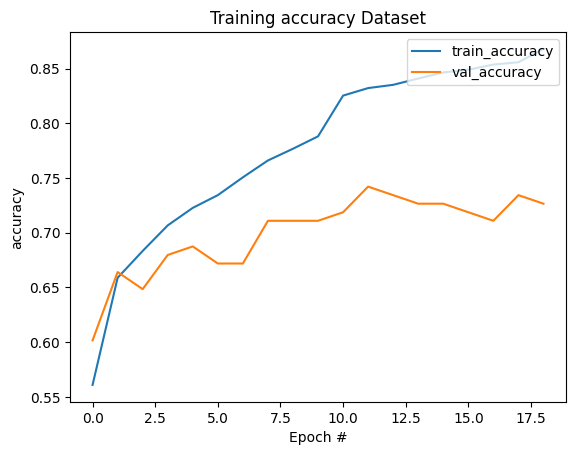

In [ ]:
plot_accuracy(resnet_hist)

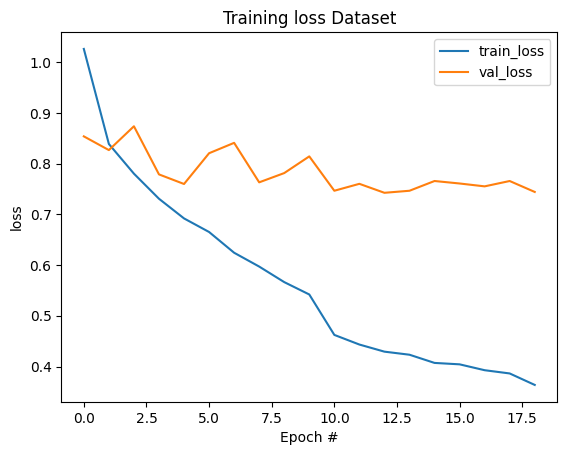

In [ ]:
plot_loss(resnet_hist)

4/4 [==============================] - 1s 31ms/step
              precision    recall  f1-score   support

           0       0.84      0.81      0.83        32
           1       0.50      0.62      0.56        32
           2       0.71      0.62      0.67        32
           3       0.93      0.84      0.89        32

    accuracy                           0.73       128
   macro avg       0.75      0.73      0.73       128
weighted avg       0.75      0.73      0.73       128



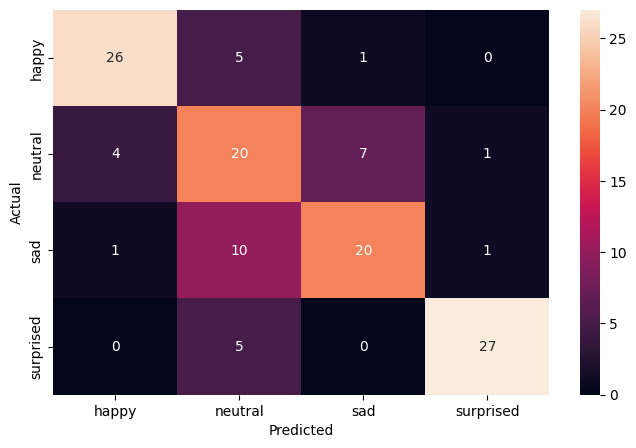

In [ ]:
# get test images and their classes
test_images, test_classes = next(test_generator_rgb_2)
actual_classes = np.argmax(test_classes, axis = -1)

# Make predictions
resnet_predictions = resnet_engine_model.predict(test_images)
# Convert predictions to class labels
resnet_predictions = np.argmax(resnet_predictions, axis = -1)

# generate classification report and confussion matrix
metrics_score(actual_classes,resnet_predictions )

**Observations and Insights:**
* its testing result have improved continuously throughout training, the improvement of validation results showed much slower progress, indicating high level of overfitting
* it confuses neutral and sad classes
* also did poorly with neutral class, for which both recall and precision are quite low (it classified as neutral items from all other classes, it was not able to properly capture the characteristics of neutrality)




**Note: You can even go back and build your own architecture on top of the ResNet Transfer layer and see if you can improve the performance.**

## **EfficientNet Model**

In [ ]:
# clear the previous model's history from the Keras backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(666)
import random
random.seed(666)
tf.random.set_seed(666)

In [ ]:
# instantiate EffectiveNetB0 model
model = EfficientNetB0(weights='imagenet')
model.summary()

Model: "efficientnet-b0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 stem_conv (Conv2D)          (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 stem_bn (BatchNormalizatio  (None, 112, 112, 32)         128       ['stem_conv[0][0]']           
 n)                                                                                               
                                                                                                  
 stem_activation (Activatio  (None, 112, 112, 32)         0         ['stem_bn[0][0]'

### **Model Building**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
# again, I will use the entire EfficientNet architechture up to top_dropout layer
transfer_layer = model.get_layer('top_dropout')
effnet_model = Model(inputs=model.input, outputs=transfer_layer.output)
effnet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 stem_conv (Conv2D)          (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 stem_bn (BatchNormalizatio  (None, 112, 112, 32)         128       ['stem_conv[0][0]']           
 n)                                                                                               
                                                                                                  
 stem_activation (Activatio  (None, 112, 112, 32)         0         ['stem_bn[0][0]']         

In [ ]:
# # Making all the layers of the Resnet model non-trainable. i.e. freezing them
for layer in effnet_model.layers:
    layer.trainable = False
    print(layer.name, layer.trainable)

input_1 False
stem_conv False
stem_bn False
stem_activation False
block1a_dwconv False
block1a_bn False
block1a_activation False
block1a_se_squeeze False
block1a_se_reshape False
block1a_se_reduce False
block1a_se_expand False
block1a_se_excite False
block1a_project_conv False
block1a_project_bn False
block2a_expand_conv False
block2a_expand_bn False
block2a_expand_activation False
block2a_dwconv False
block2a_bn False
block2a_activation False
block2a_se_squeeze False
block2a_se_reshape False
block2a_se_reduce False
block2a_se_expand False
block2a_se_excite False
block2a_project_conv False
block2a_project_bn False
block2b_expand_conv False
block2b_expand_bn False
block2b_expand_activation False
block2b_dwconv False
block2b_bn False
block2b_activation False
block2b_se_squeeze False
block2b_se_reshape False
block2b_se_reduce False
block2b_se_expand False
block2b_se_excite False
block2b_project_conv False
block2b_project_bn False
block2b_drop False
block2b_add False
block3a_expand_conv Fa

In [ ]:
# building CNN model with Efficient Net engine
# I will use same CNN structure and only replace the engine to Efficient Net

effnet_engine_model = Sequential()

# Adding the convolutional part of the Efficient Net created above
effnet_engine_model.add(resnet_model)

# Flattening the output of the Efficient Net engine
effnet_engine_model.add(Flatten())

# Adding a dense output layer
effnet_engine_model.add(Dense(32))
effnet_engine_model.add(LeakyReLU(0.1))
effnet_engine_model.add(Dropout(0.1))
effnet_engine_model.add(Dense(32))
effnet_engine_model.add(LeakyReLU(0.1))
effnet_engine_model.add(Dense(16))
effnet_engine_model.add(LeakyReLU(0.1))
effnet_engine_model.add(Dense(4, activation='softmax'))

# print model summary
effnet_engine_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 2048)              23564800  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 32)                65568     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32)                0         
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32)                0

### **Compiling and Training the Model**

In [ ]:
# compiling the model with Adam optimizer, categorical crossentropy loss function as this is multi class model
# and accuracy metrics to evaluate the models performance during traiing and validation

opt = Adam(learning_rate = 0.001) #use Adam optimizer with default learning rate

effnet_engine_model.compile(loss="categorical_crossentropy", optimizer=opt, metrics = ['accuracy'])

In [ ]:
# Pulling a single large batch of random validatio data for validating after each epoch
valX, valY = validation_generator_rgb_2.next()

# the following code will stop the training if the val_loss continues above min val_loss for the run for more than 8 epochs
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 8)

# Reduce LR on Plateau callback will reduce the learning rate to 0.2 of its current value, if val_loss does not improve for 5 consecutive epochs
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_loss',
                                            patience = 5,
                                            verbose = 1,
                                            factor = 0.2,
                                            cooldown = 2,
                                            min_lr = 0.0001)

effnet_hist = effnet_engine_model.fit(train_generator_rgb_2,
                              validation_data=(valX, valY),
                              epochs=20,
                              callbacks = [es, learning_rate_reduction])

Epoch 1/20
237/237 [==============================] - 39s 149ms/step - loss: 1.0260 - accuracy: 0.5628 - val_loss: 0.7990 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 2/20
237/237 [==============================] - 32s 134ms/step - loss: 0.8473 - accuracy: 0.6492 - val_loss: 0.7924 - val_accuracy: 0.6953 - lr: 0.0010
Epoch 3/20
237/237 [==============================] - 25s 107ms/step - loss: 0.7877 - accuracy: 0.6758 - val_loss: 0.7204 - val_accuracy: 0.7266 - lr: 0.0010
Epoch 4/20
237/237 [==============================] - 31s 130ms/step - loss: 0.7404 - accuracy: 0.6990 - val_loss: 0.7385 - val_accuracy: 0.7031 - lr: 0.0010
Epoch 5/20
237/237 [==============================] - 26s 108ms/step - loss: 0.7030 - accuracy: 0.7183 - val_loss: 0.7082 - val_accuracy: 0.7188 - lr: 0.0010
Epoch 6/20
237/237 [==============================] - 36s 151ms/step - loss: 0.6713 - accuracy: 0.7285 - val_loss: 0.7536 - val_accuracy: 0.6719 - lr: 0.0010
Epoch 7/20
237/237 [==============================] 

### **Evaluating the EfficientnetNet Model**

In [ ]:
# evaluate vgg_engine_model on test data
effnet_engine_model.evaluate(test_generator_rgb_2)

1/1 [==============================] - 0s 372ms/step - loss: 0.8468 - accuracy: 0.7031


[0.8468083143234253, 0.703125]

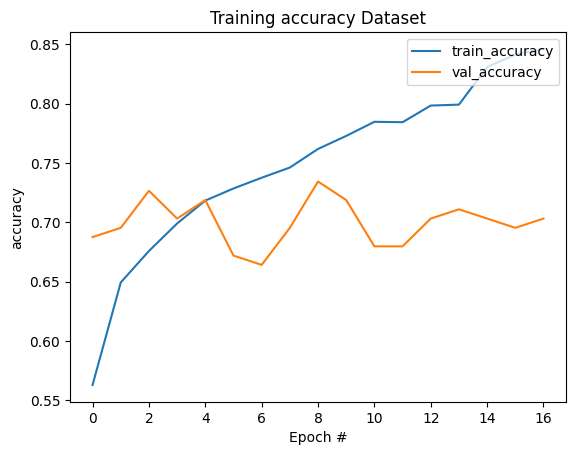

In [ ]:
plot_accuracy(effnet_hist)

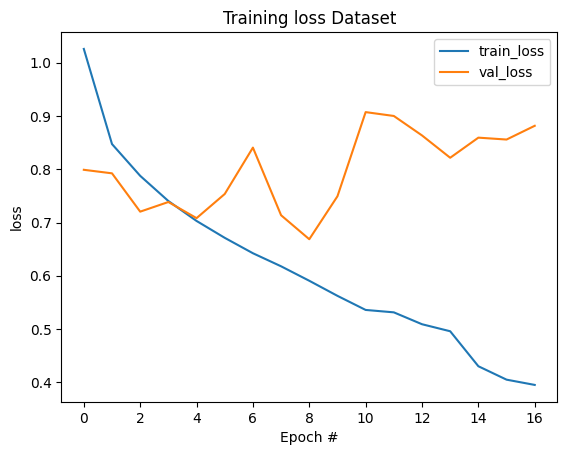

In [ ]:
plot_loss(effnet_hist)

4/4 [==============================] - 0s 33ms/step
              precision    recall  f1-score   support

           0       0.76      0.78      0.77        32
           1       0.53      0.50      0.52        32
           2       0.67      0.75      0.71        32
           3       0.86      0.78      0.82        32

    accuracy                           0.70       128
   macro avg       0.70      0.70      0.70       128
weighted avg       0.70      0.70      0.70       128



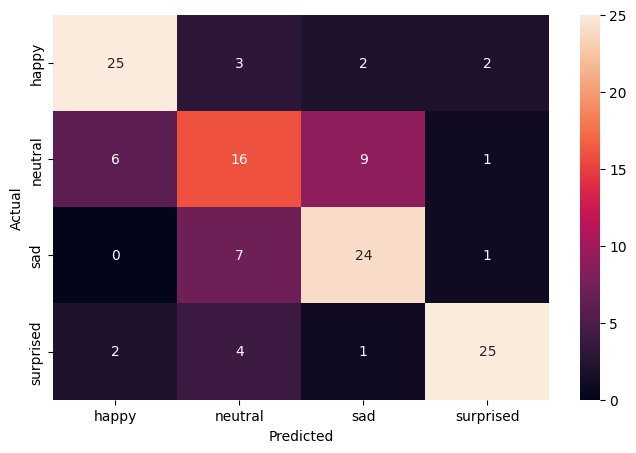

In [ ]:
# get test images and their classes
test_images, test_classes = next(test_generator_rgb_2)
actual_classes = np.argmax(test_classes, axis = -1)

# Make predictions
effnet_predictions = effnet_engine_model.predict(test_images)
# Convert predictions to class labels
effnet_predictions = np.argmax(effnet_predictions, axis = -1)

# generate classification report and confussion matrix
metrics_score(actual_classes,effnet_predictions )

**Observations and Insights:**
* EfficientNet both training loss and training accuracy were continuously improving during training, while validation values were stuck on same level and have not improved
* model memorized the training set and did not learn to generalize
* EfficientNet base model also struggled mostly with identification of neutral class, for which recall and precision scores were lowest
* it is recommended to fine tue the model




**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance.**

**Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?
* Do you think our issue lies with 'rgb' color_mode?

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

## **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

## **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

### **Model Building**

- Try building a layer with 5 Convolutional Blocks and see if performance increases.

In [ ]:
# clear the previous model's history from the Keras backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(666)
import random
random.seed(666)
tf.random.set_seed(666)

In [ ]:
# Flowing training images in batches of 20 using train_datagen generator grayscale
train_generator_gray_2 = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=64,
                                                    class_mode='categorical',
                                                    target_size=(48, 48),
                                                    color_mode = 'grayscale')

# Flowing testing images in batches of 20 using test_datagen generator grayscale
test_generator_gray_2 =  test_datagen.flow_from_directory(test_dir,
                                                   batch_size=128,
                                                   class_mode  = 'categorical',
                                                   target_size = (48, 48),
                                                   color_mode = 'grayscale')

# Flowing validation images in batches of 20 using test_datagen generator grayscale
validation_generator_gray_2 =  validation_datagen.flow_from_directory(val_dir,
                                                   batch_size=128,
                                                   class_mode  = 'categorical',
                                                   target_size = (48, 48),
                                                   color_mode = 'grayscale')

Found 15109 images belonging to 4 classes.
Found 128 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.


In [ ]:
# CNN composed of 5 convolutional blocks

cnn_model_3 = Sequential()
cnn_model_3.add(Conv2D(256, (3,3),  input_shape=(48, 48, 1), padding = 'same'))
cnn_model_3.add(LeakyReLU(0.1))
cnn_model_3.add(Conv2D(256, (3,3),  padding = 'same'))
cnn_model_3.add(LeakyReLU(0.1))
cnn_model_3.add(MaxPooling2D(2,2))
cnn_model_3.add(BatchNormalization())

cnn_model_3.add(Conv2D(128, (3,3),  padding = 'same'))
cnn_model_3.add(LeakyReLU(0.1))
cnn_model_3.add(Conv2D(128, (3,3),  padding = 'same'))
cnn_model_3.add(LeakyReLU(0.1))
cnn_model_3.add(MaxPooling2D(2,2))
cnn_model_3.add(BatchNormalization())

cnn_model_3.add(Conv2D(64, (3,3),  padding = 'same'))
cnn_model_3.add(LeakyReLU(0.1))
cnn_model_3.add(Conv2D(64, (3,3),  padding = 'same'))
cnn_model_3.add(LeakyReLU(0.1))
cnn_model_3.add(MaxPooling2D(2,2))

cnn_model_3.add(Conv2D(32, (3,3),  padding = 'same'))
cnn_model_3.add(LeakyReLU(0.1))
cnn_model_3.add(MaxPooling2D(2,2))
cnn_model_3.add(BatchNormalization())

cnn_model_3.add(Conv2D(16, (3,3),  padding = 'same'))
cnn_model_3.add(LeakyReLU(0.1))
cnn_model_3.add(BatchNormalization())

cnn_model_3.add(Flatten())

cnn_model_3.add(Dense(32))
cnn_model_3.add(LeakyReLU(0.1))
cnn_model_3.add(Dropout(0.2))

cnn_model_3.add(Dense(32))
cnn_model_3.add(LeakyReLU(0.2))

cnn_model_3.add(Dense(32))
cnn_model_3.add(LeakyReLU(0.2))

cnn_model_3.add(Dense(4, activation='softmax'))

### **Compiling and Training the Model**

In [ ]:
# compiling the model with Adam optimizer, categorical crossentropy loss function as this is multi class model
# and accuracy metrics to evaluate the models performance during traiing and validation

opt = Adam(learning_rate = 0.001) #use Adam optimizer with default learning rate
cnn_model_3.compile(loss="categorical_crossentropy", optimizer=opt, metrics = ['accuracy'])

In [ ]:
# Pulling a single large batch of random validatio data for validating after each epoch
valX, valY = validation_generator_gray_2.next()

# the following code will stop the training if the val_loss continues above min val_loss for the run for more than 8 epochs
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 8)

# Reduce LR on Plateau callback will reduce the learning rate to 0.2 of its current value, if val_loss does not improve for 5 consecutive epochs
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_loss',
                                            patience = 5,
                                            verbose = 1,
                                            factor = 0.2,
                                            cooldown = 2,
                                            min_lr = 0.0001)

cnn_3_hist = cnn_model_3.fit(train_generator_gray_2,
                              validation_data=(valX, valY),
                              epochs=20,
                              callbacks = [es, learning_rate_reduction])

Epoch 1/20
237/237 [==============================] - 14s 41ms/step - loss: 1.2577 - accuracy: 0.3983 - val_loss: 1.2567 - val_accuracy: 0.4375 - lr: 0.0010
Epoch 2/20
237/237 [==============================] - 9s 40ms/step - loss: 0.9883 - accuracy: 0.5624 - val_loss: 0.9693 - val_accuracy: 0.6172 - lr: 0.0010
Epoch 3/20
237/237 [==============================] - 11s 46ms/step - loss: 0.8263 - accuracy: 0.6480 - val_loss: 1.1891 - val_accuracy: 0.4453 - lr: 0.0010
Epoch 4/20
237/237 [==============================] - 8s 35ms/step - loss: 0.7372 - accuracy: 0.6903 - val_loss: 0.7970 - val_accuracy: 0.6484 - lr: 0.0010
Epoch 5/20
237/237 [==============================] - 10s 40ms/step - loss: 0.6718 - accuracy: 0.7289 - val_loss: 0.8621 - val_accuracy: 0.6641 - lr: 0.0010
Epoch 6/20
237/237 [==============================] - 10s 40ms/step - loss: 0.6218 - accuracy: 0.7466 - val_loss: 0.8477 - val_accuracy: 0.6406 - lr: 0.0010
Epoch 7/20
237/237 [==============================] - 8s 35m

### **Evaluating the Model on Test Set**

In [ ]:
# evaluate vgg_engine_model on test data
cnn_model_3.evaluate(test_generator_gray_2)

1/1 [==============================] - 0s 351ms/step - loss: 0.8662 - accuracy: 0.8203


[0.8662301301956177, 0.8203125]

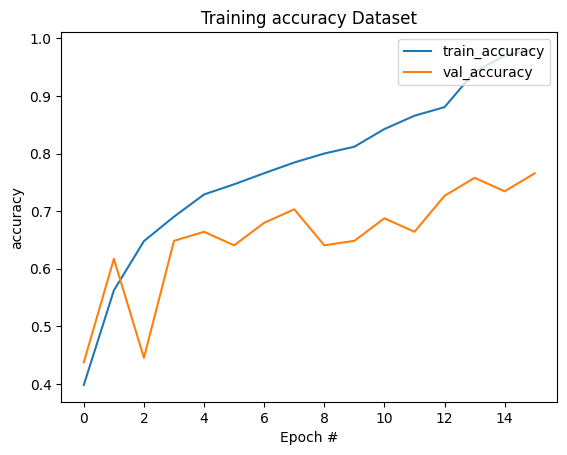

In [ ]:
plot_accuracy(cnn_3_hist)

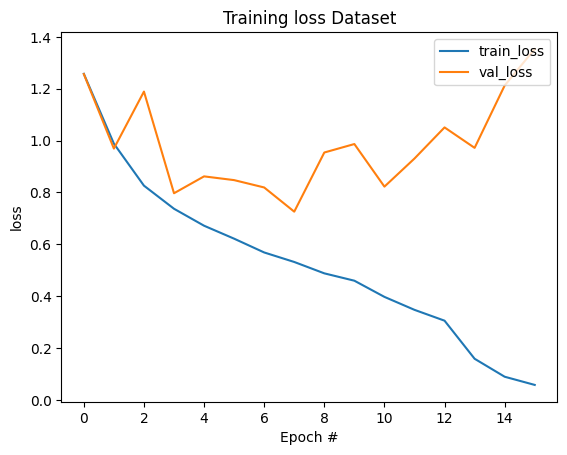

In [ ]:
plot_loss(cnn_3_hist)

4/4 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.87      0.84      0.86        32
           1       0.73      0.75      0.74        32
           2       0.75      0.75      0.75        32
           3       0.94      0.94      0.94        32

    accuracy                           0.82       128
   macro avg       0.82      0.82      0.82       128
weighted avg       0.82      0.82      0.82       128



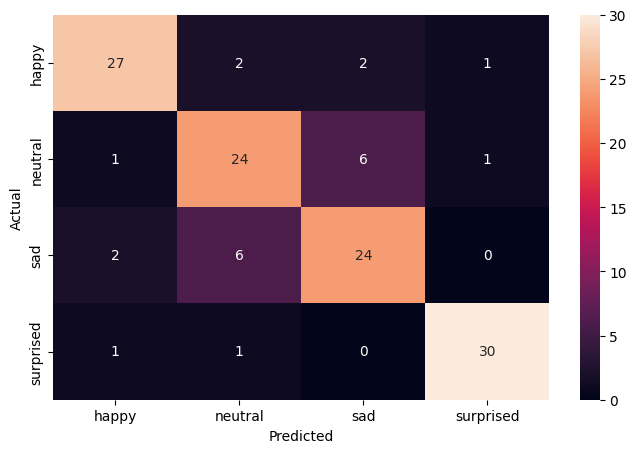

In [ ]:
# get test images and their classes
test_images, test_classes = next(test_generator_gray_2)
actual_classes = np.argmax(test_classes, axis = -1)

# Make predictions
cnn_3_predictions = cnn_model_3.predict(test_images)
# Convert predictions to class labels
cnn_3_predictions = np.argmax(cnn_3_predictions, axis = -1)

# generate classification report and confussion matrix
metrics_score(actual_classes,cnn_3_predictions )

**Observations and Insights:**
* 5 Convolutional Blocks model has achieved accuracy of 98% on training, 77% on validation and 82% on test datasets respectively
* the model's most problematic misclassifications are again between neutral and sad, however it misclassied fewer instances than other models and got best recall and precision scores for those classes
* its results outperformed all other models
* the model show signs of overfitting, as the training accuracy is higher than validation, validation loss increased during the last epochs, and should be fine tuned
* testing results however are satifactory, and model could be recommended for implementation

### **Plotting the Confusion Matrix for the chosen final model**

In [ ]:
# generating comparison of number of trained att and achieved accuracy measures for all models

# create a dict with models, their names, history repositories and test data sets
models = {
    cnn_model_1 : ['cnn_model_1', cnn_1_hist_gray, test_generator_gray],
cnn_model_1rgb: ['cnn_model_1rgb', cnn_1_hist_rgb, test_generator_rgb],
cnn_model_2: ['cnn_model_2', cnn_2_hist, test_generator_rgb],
vgg_engine_model: ['vgg_engine_model', vgg_hist, test_generator_rgb_2],
resnet_engine_model: ['resnet_engine_model', resnet_hist,test_generator_rgb_2],
effnet_engine_model:['effnet_engine_model', effnet_hist,test_generator_rgb_2],
cnn_model_3:['cnn_model_3', cnn_3_hist, test_generator_gray_2],
}
titles = [ '-Model Name-', '-Trained Attr-', '-Train Acc-', '-Val Acc-', '-Test Acc-']
print(f'{titles[0]:<24} {titles[1]:<18} {titles[2]:<12} {titles[3]:<12} {titles[4]}')

# run a loop through models and generate required stats for comparison
for model, values in models.items():
    print(f'{values[0]:<28}', end='')
    print (f'{sum([tf.size(w) for w in model.trainable_variables]).numpy():<19}', end='')
    acc = round(values[1].history['accuracy'][-1],2)
    print (f'{acc:<13}', end = '')
    val_acc = round(values[1].history['val_accuracy'][-1],2)
    print (f'{val_acc:<13}', end = '')
    loss, accuracy = model.evaluate(values[2], verbose = 0)
    print (round(accuracy,2))


-Model Name-             -Trained Attr-     -Train Acc-  -Val Acc-    -Test Acc-
cnn_model_1                 71508              0.79         0.77         0.75
cnn_model_1rgb              72660              0.79         0.65         0.73
cnn_model_2                 2668980            0.98         0.72         0.78
vgg_engine_model            804500             0.84         0.65         0.7
resnet_engine_model         67220              0.87         0.73         0.73
effnet_engine_model         67220              0.85         0.7          0.7
cnn_model_3                 1176820            0.98         0.77         0.82


**Observations and Insights:**
* the best performing of all investigated models turn out to be cnn_model_3, which is a 5 convolutional block model
* it is worth emphasizing that the smallest/simplest models (cnn_model_1 and cnn_model_1rgb) have also achieved relatively good results compared to the other more sophisticated models at much lower computational cost
* all of the pre trained models have performed relatively poorly on the face datasets,



## **Conclusion:**

### **Insights**

### **Refined insights/executive summary**:
- What are the most meaningful insights from the data relevant to the problem?
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?
1. the available data set consists of 15109 images in training data set, 4977 images in calidation data set and 128 testing set images,
2. available pictures are in various orientations, cropping and positioning, they should be further augmented to analyse the effect on models performance,
3. anaysis consisted of building and evaluating performance of 7 different models (one of the models was run in 2 versions on gray-scale and rgb inputs data),
4. 3 pre trained models were evaluated: VGG16, ResNet, EfficientNet, and all of them performed rather poorly, not being able to equal the results of the less sophisticated models (cnn_model_1, cnn_model_2, cnn_model_3). This could be due to the fact these are deep architectures and might be more appropriate for more complex structures,
5. best performing model is cnn_model_3, the model should still be fine tuned and re-evaluated as there is still potential to achieve some perfomance improvements. It is also advisable to re-train the model on an augmented data set, preferable with an increased volume of images


### **Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?

The proposed model is cnn_model_3, consisting of 5 convolutional blocks (please refer to cnn_model_3 building section above for detailed specification of the model). This model has performed best of all models across all data set (training, validation, test) , achieving best recall and precision scores on the test set. It outperformed all other models, specially in the classification of neutral and sad facial emotions.



Recommendations for implementation

Before implementing the solution:
* fine tune the model as it is overfitting
* investigate the effects of model performance on increased volume of training set images
* investigate the effects of model performance with additional perturbations
added via image augmentation
* revise train image classes to reduce ambiguity between neutral and sad image sets



